<a href="https://colab.research.google.com/github/JuanFc28/LicensePlateRecognition/blob/main/Project_License_Plates_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Yolo (ultralytics), roboflow and libraries to be used


In [ ]:
!pip install ultralytics roboflow
!pip install opencv-python-headless
!pip install roboflow

import cv2
import matplotlib.pyplot as plt
import glob
import random
import os
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


## Importing the "License-plate-recognition-rxg4e" dataset
Retrieved from https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="aHs234DmnsOli8")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:09<00:00, 5165.75it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Yolov8 model training
I chose the YOLOv8 Nano (yolov8n) for these reasons:
- It can process images in real time, which would be a great help in real-world implementations, such as vehicle access control.

- It's a modern CNN that automatically extracts complex features. It's also lightweight, making it ideal for deployment in environments with limited hardware.

In [ ]:
from ultralytics import YOLO

#Datset directory
DATASET_DIR = '/content/License-Plate-Recognition-4'

#precharge model of yolov8
model = YOLO('yolov8n.pt')

#archive route for data.yaml
yaml_path = f"{DATASET_DIR}/data.yaml"

print(f"Iniciando entrenamiento usando: {yaml_path}")

#Training parameters
results = model.train(
    data=yaml_path,
    epochs=20,
    imgsz=640,
    plots=True
)

Iniciando entrenamiento usando: /content/License-Plate-Recognition-4/data.yaml
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, opt

## Show training results and metrics
Precision and recall metrics were used to measure false positives and negatives; these results can also be observed in the confusion matrix.

In summary, the model training was successful. The loss curves show stable convergence without signs of overfitting. The confusion matrix confirms 98% accuracy in the 'license-plate' class, ensuring that the system will detect incoming vehicles with high reliability for the subsequent OCR step.

Evaluation Metrics
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1108.1±417.5 MB/s, size: 42.5 KB)
val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2046/2046 3.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 6.6it/s 19.5s
                   all       2046       2132      0.986      0.955      0.984      0.698
Speed: 1.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val4

Results of the model training:
Precision: 0.9860
Recall: 0.9553
F1-Score: 0.9704
Confusion Matrix:


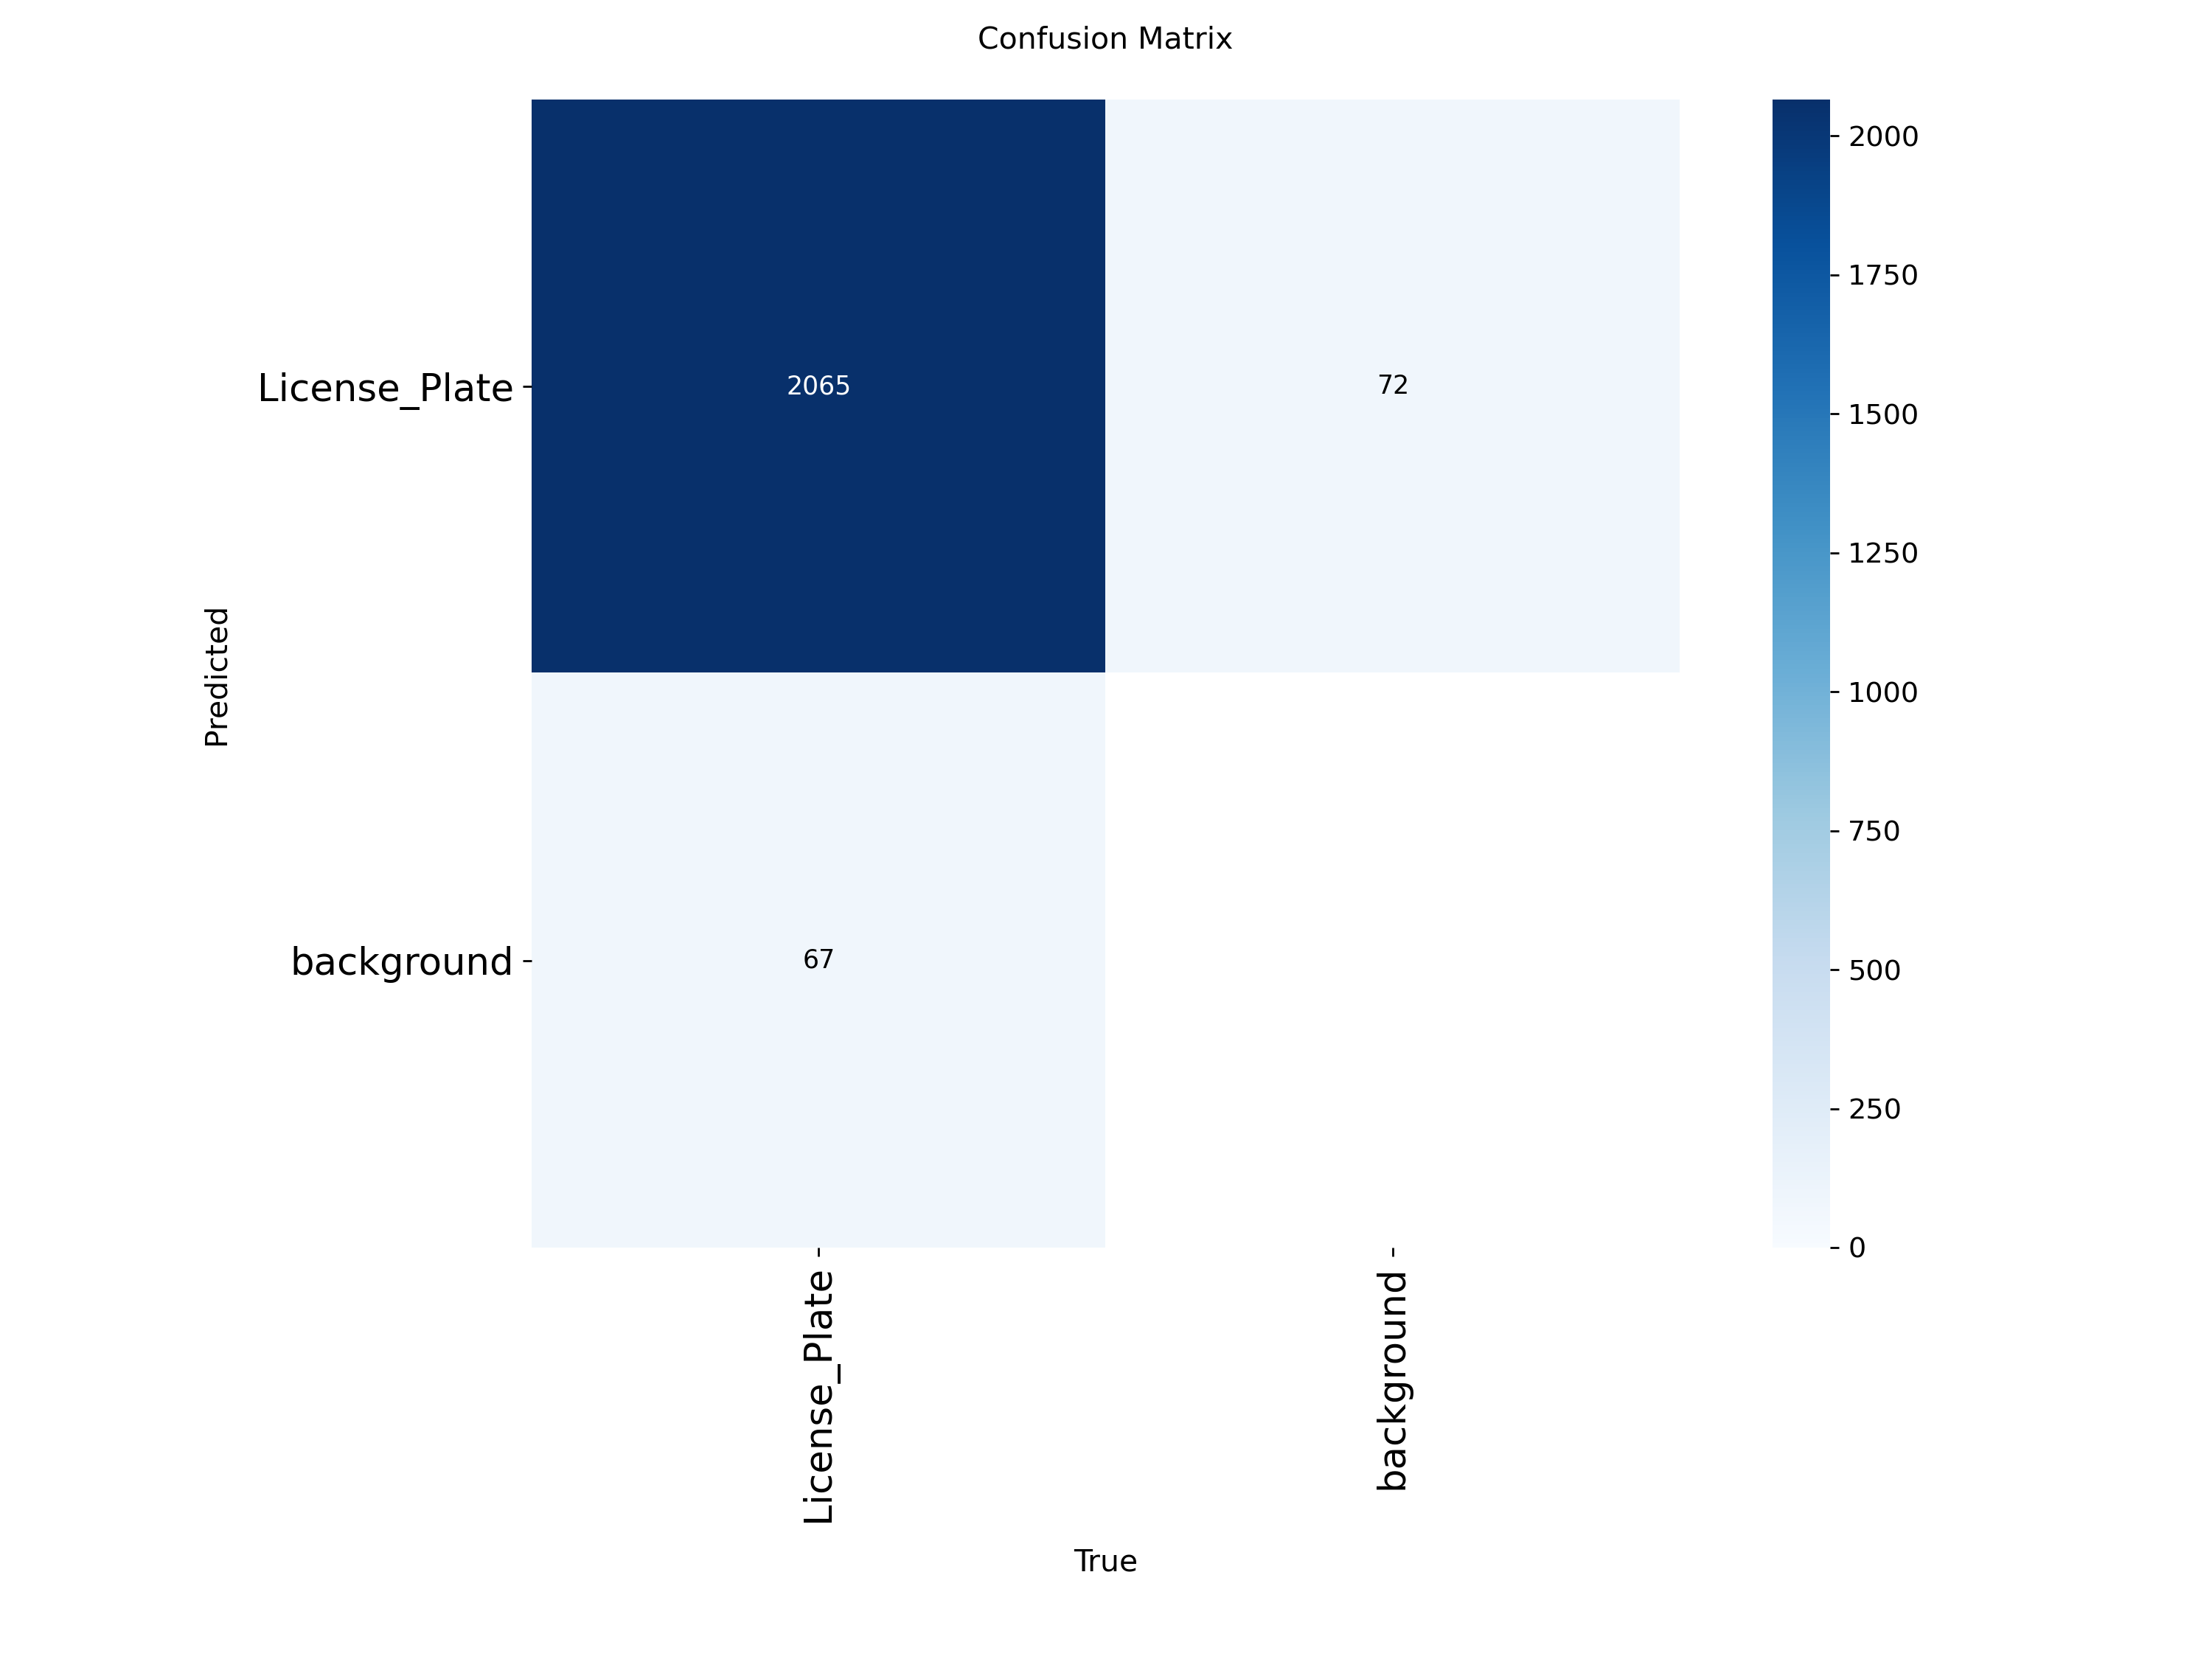


Loss & Accuracy:


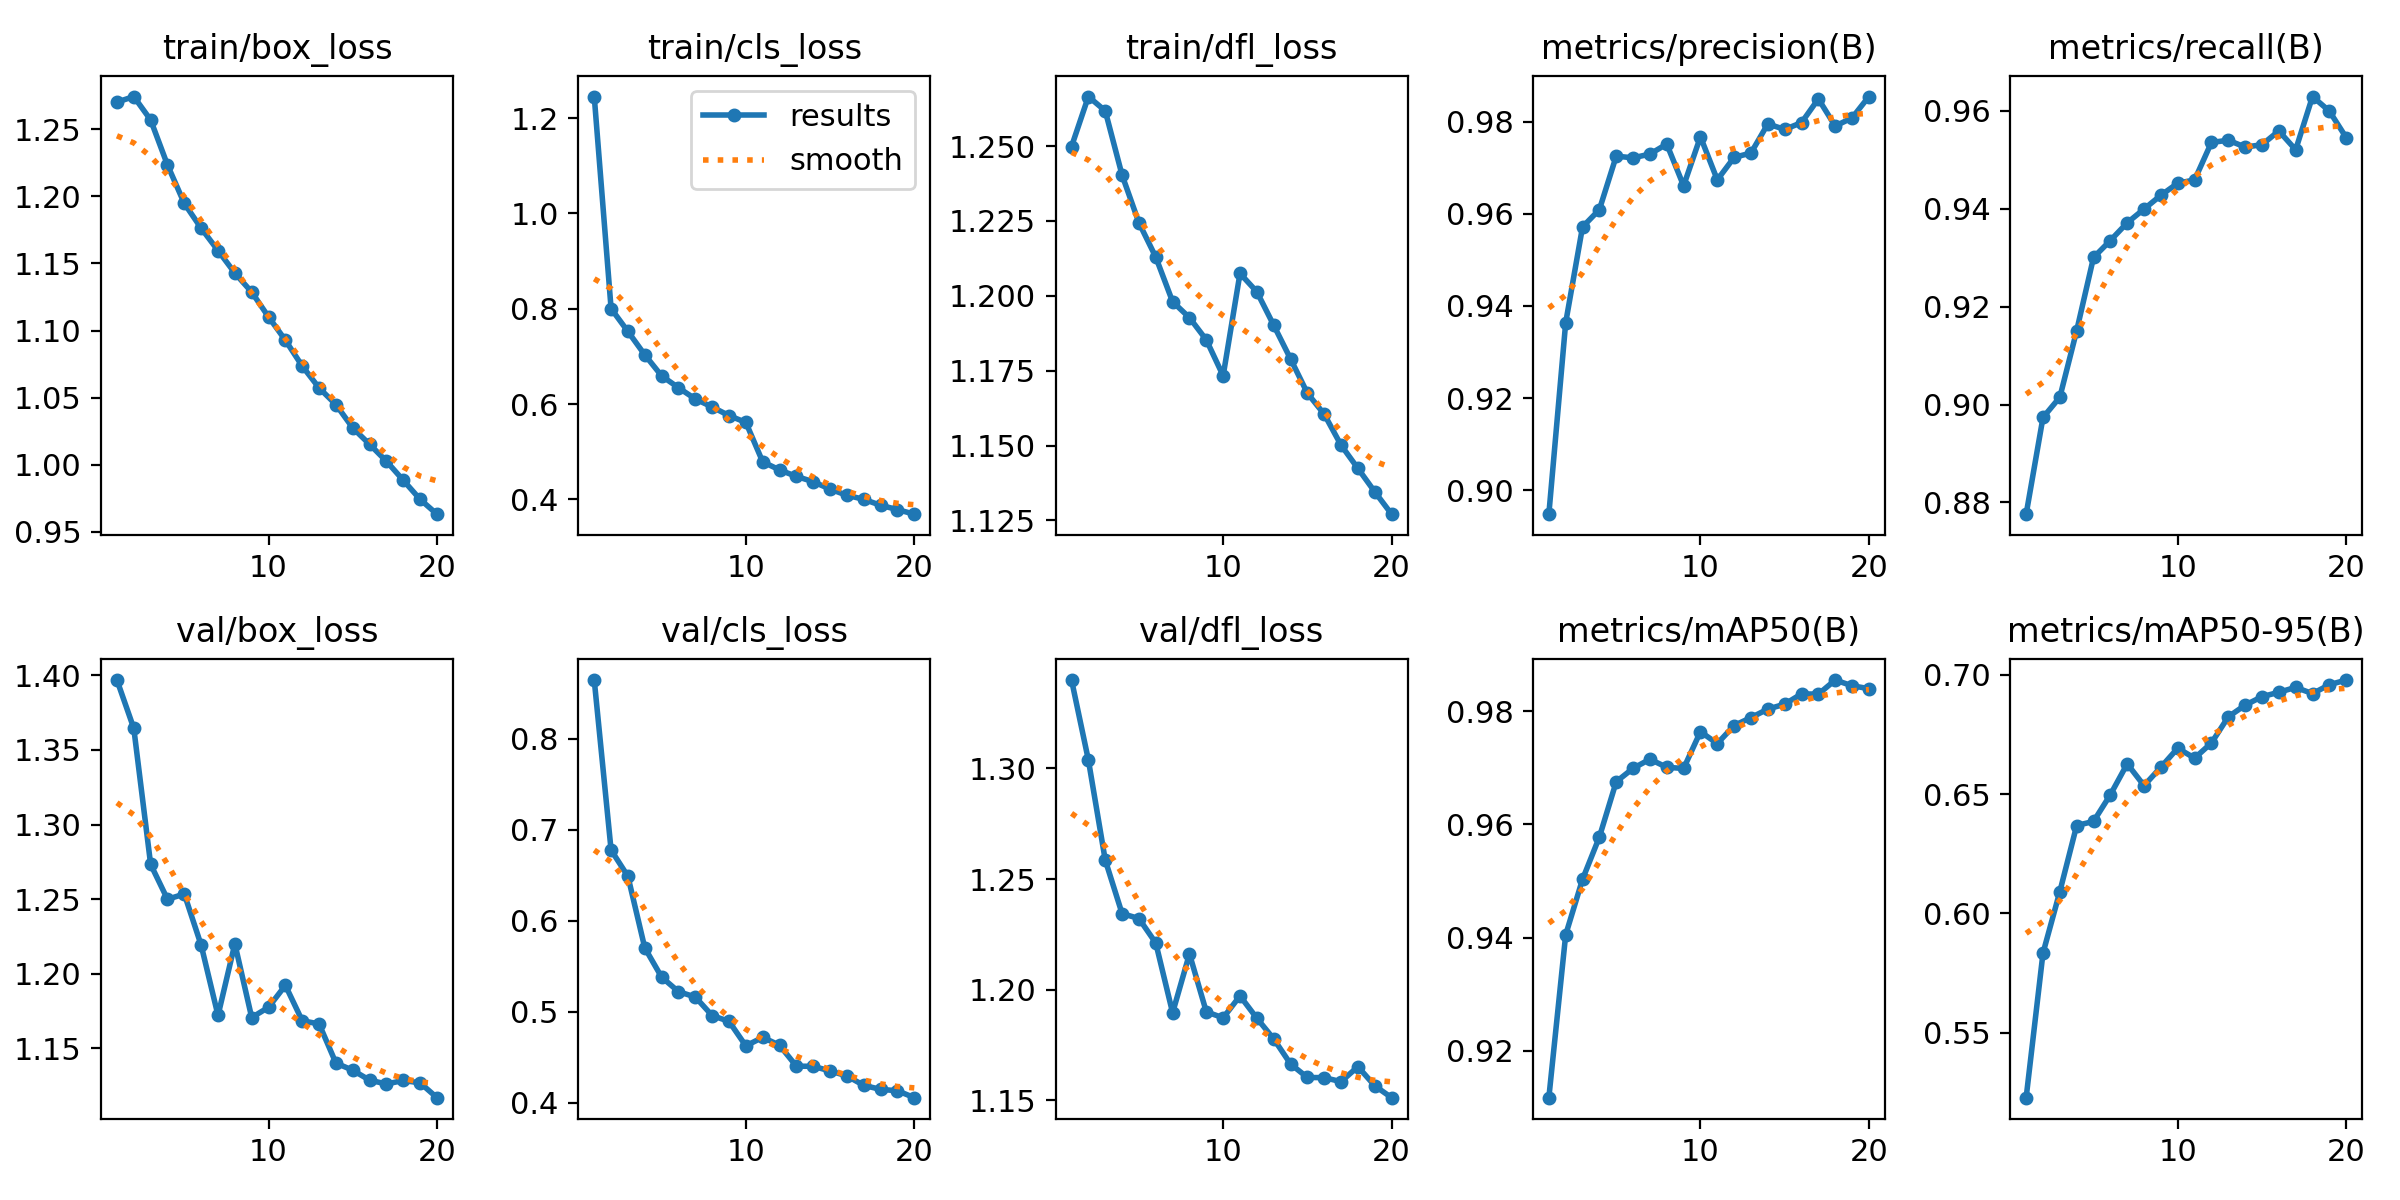


Validation Examples:


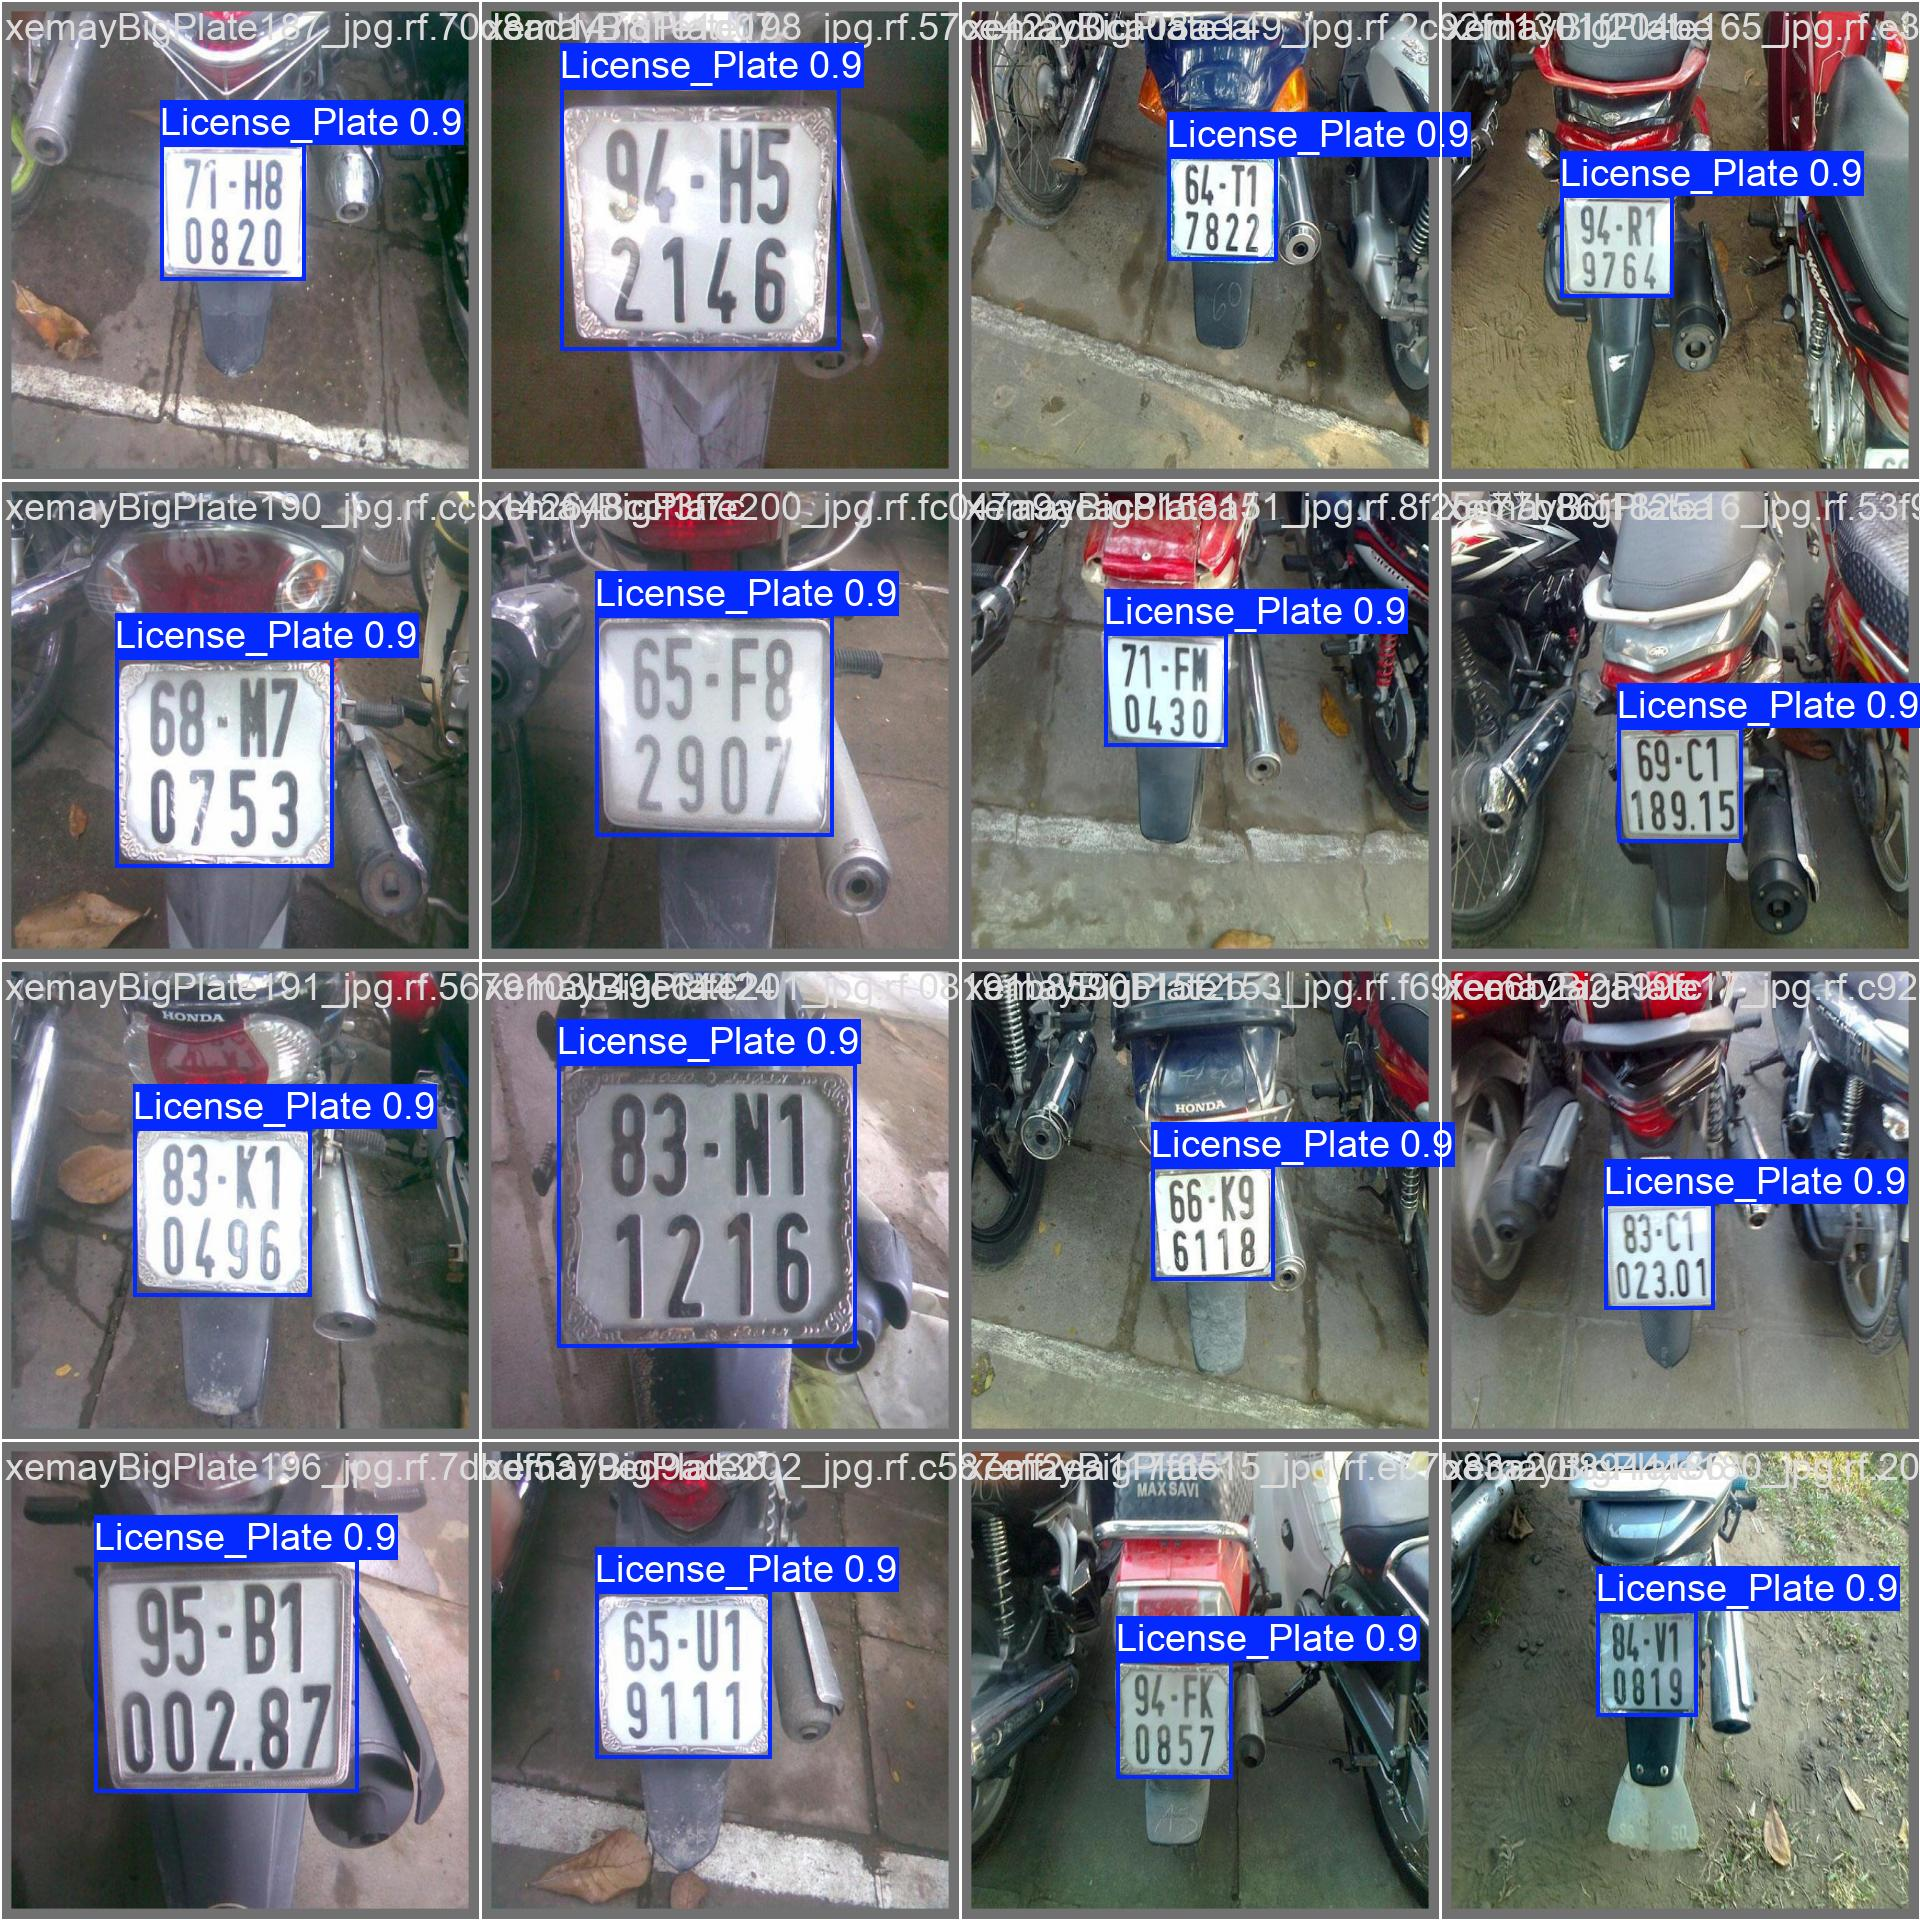

In [ ]:
from IPython.display import Image, display
import os

# Directory where the training results are stored
results_dir = '/content/runs/detect/train'

# best model path
best_model_path = os.path.join(results_dir, 'weights/best.pt')

# Load the best model to validate it
if os.path.exists(best_model_path):
    best_model = YOLO(best_model_path)

    print("Evaluation Metrics")

    # Execute validation
    metrics = best_model.val(data=yaml_path, verbose=False)

    # Print numerical results
    print("\nResults of the model training:")
    print(f"Precision: {metrics.box.mp:.4f}")
    print(f"Recall: {metrics.box.mr:.4f}")

    # f1 score calculation
    p = metrics.box.mp
    r = metrics.box.mr
    f1_score = 2 * (p * r) / (p + r)
    print(f"F1-Score: {f1_score:.4f}")

else:
    print(f"Error: No se encontro el modelo en {best_model_path}")


#Confusion Matrix
confusion_matrix_path = os.path.join(results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    print("Confusion Matrix:")
    display(Image(filename=confusion_matrix_path, width=600))

#Training Curves (Loss and Accuracy)
results_png = os.path.join(results_dir, 'results.png')
if os.path.exists(results_png):
    print("\nLoss & Accuracy:")
    display(Image(filename=results_png, width=800))

#Validation Examples
val_batch = os.path.join(results_dir, 'val_batch0_pred.jpg')
if os.path.exists(val_batch):
    print("\nValidation Examples:")
    display(Image(filename=val_batch, width=800))

## Installing EasyOCR, a PyTorch library for reading text
This PyTorch library was chosen because it's a modern implementation that uses a CNN (ResNet) to extract visual features from letters, an RNN (LSTM) to understand the text sequence (context), and a CTC decoder to convert that into words.

In [ ]:
!pip install easyocr

import easyocr

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'], gpu=True)

## Function of OCR and image preprocessing
The following classic filters were applied for improved character comprehension:
- Upscaling: Enlarging the image size so the library can read it and see clear patterns.
- Bilateral filter: Smooths flat areas of the image, such as the background of the plates. This filter was implemented instead of a Gaussian filter because the latter would not respect the edges of the characters, preventing accurate letter detection.
- Thresholding: Optimally separates letters from the background, aiding in character identification.

In [ ]:
def read_license_plate(original_img, coords):
    """
    Reads a license plate from an image using EasyOCR.
    """
    x1, y1, x2, y2 = coords
    h, w, _ = original_img.shape

    #validate coordinates to avoid out-of-bounds errors
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)

    # Crop the roi
    plate_crop = original_img[y1:y2, x1:x2]
    if plate_crop.size == 0: return "", 0.0

    #Upscaling
    plate_crop = cv2.resize(plate_crop, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

    #Convert to grayscale
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)

    #bilaterla filter
    gray = cv2.bilateralFilter(gray, 11, 17, 17)

    #thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    results = reader.readtext(
        binary,
        detail=0,
        allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',
        text_threshold=0.7,
        low_text=0.4,
        mag_ratio=1.5
    )

    # Join results and remove spaces
    detected_text = "".join(results).replace(" ", "")

    #validation of the lecture
    if len(detected_text) > 4:
        return detected_text, 1.0
    else:
        #retry with grayscale
        retry_results = reader.readtext(gray, detail=0, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        retry_text = "".join(retry_results).replace(" ", "")
        return retry_text, 0.5

    return detected_text, 0.0

## Manual testing of license plate reading
Images of vehicles showing the license plate from the front were used, simulating vehicle access.
Almost all the boards are read perfectly, except for board XYZ789Q, which detects a "0" instead of a "Q". This shows that the model is not perfect, but it has good accuracy. The results will be shown in the simulation later.

INICIANDO EL TEST

Procesando: captura6.png
 Placa detectada y leida: RCV3C89


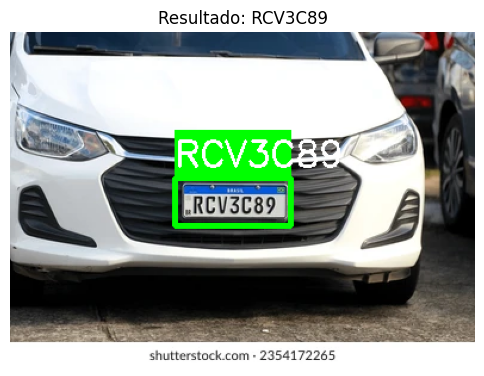

Procesando: carro1.png
 Placa detectada y leida: XYZ7890


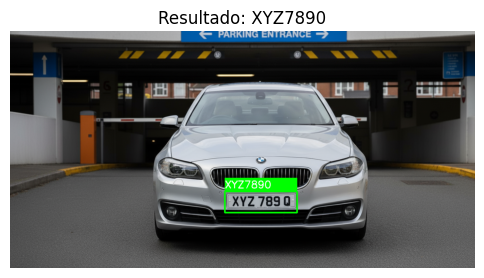

Procesando: carro4.png
 Placa detectada y leida: MXF837S


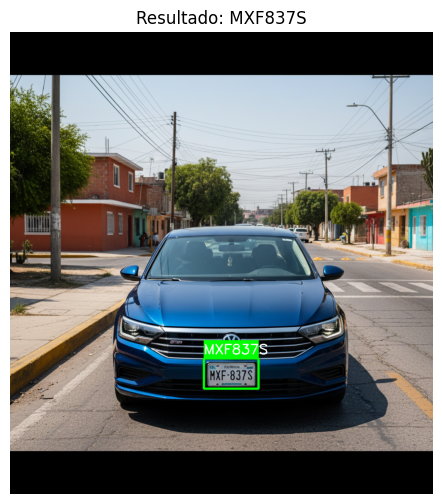

Procesando: carro2.png
 Placa detectada y leida: RST456E


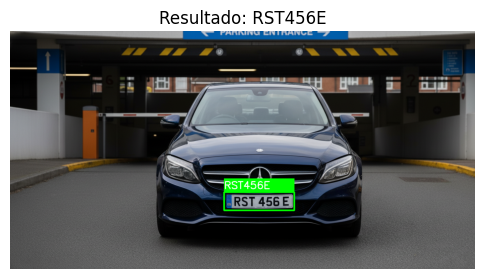

Procesando: carro3.png
 Placa detectada y leida: GTR091S


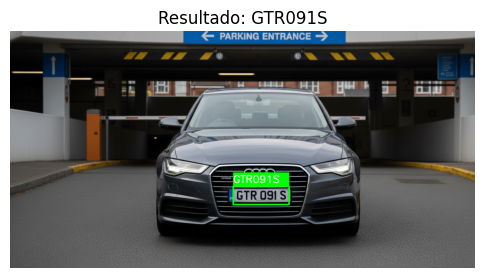

 RESUMEN DE LECTURAS
ARCHIVO         | PLACA LEIDA    
captura6.png    | RCV3C89        
carro1.png      | XYZ7890        
carro4.png      | MXF837S        
carro2.png      | RST456E        
carro3.png      | GTR091S        


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

#images for testing
image_list = [
    "captura6.png",
    "carro1.png",
    "carro4.png",
    "carro2.png",
    "carro3.png"
]

#load the best model
model = YOLO(f"{results_dir}/weights/best.pt")

# List to store the results for later use in DB simulation
read_summary = []

print(f"INICIANDO EL TEST\n")

for filename in image_list:
    img_path = f"/content/{filename}"

    print(f"Procesando: {filename}")

    if not os.path.exists(img_path):
        print(f" ERROR: No se encontro el archivo '{filename}'")
        read_summary.append((filename, "No encontrado"))
        continue

    # Read image using OpenCV
    img = cv2.imread(img_path)

    # Run YOLO detection
    results = model.predict(img_path, conf=0.25, verbose=False)
    result = results[0]

    plate_text = "No detectada"

    if len(result.boxes) == 0:
        print(" YOLO no encontro ninguna placa en la foto.")
    else:
        # Get the first detected box
        box = result.boxes[0]
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

        #funtion read_license_plate
        text, conf = read_license_plate(img, (x1, y1, x2, y2))
        plate_text = text if text else "No legible"

        #Drawing box and plates text
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.rectangle(img, (x1, y1-40), (x2, y1), (0, 255, 0), -1)
        cv2.putText(img, f"{plate_text}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        print(f" Placa detectada y leida: {plate_text}")

        #Show Image
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Resultado: {plate_text}")
        plt.axis('off')
        plt.show()

    # Save result to summary list
    read_summary.append((filename, plate_text))


#Summaru of the results
print(" RESUMEN DE LECTURAS")
print(f"{'ARCHIVO':<15} | {'PLACA LEIDA':<15}")

for filename, plate in read_summary:
    print(f"{filename:<15} | {plate:<15}")


## Database Creation
Two tables were created: one for users, containing attributes such as license plate numbers and salaries; and another for access records, containing attributes such as dates and times, access status, etc.

In [ ]:
import sqlite3

DB_NAME = "estacionamiento.db"

def setup_manual_db():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    #Drop old tables
    cursor.execute("DROP TABLE IF EXISTS usuarios")
    cursor.execute("DROP TABLE IF EXISTS accesos")

    #Users Table
    cursor.execute('''
        CREATE TABLE usuarios (
            placa TEXT PRIMARY KEY,
            propietario TEXT,
            saldo REAL DEFAULT 0.0,
            tipo TEXT -- 'Authorized' or 'NonAuthorized'
        )
    ''')

    #Acess Table
    cursor.execute('''
        CREATE TABLE accesos (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            placa TEXT,
            hora_entrada DATETIME,
            hora_salida DATETIME,
            costo REAL DEFAULT 0.0,
            estado TEXT -- 'Abierto' or 'Cerrado'
        )
    ''')

    #Users List
    predefined_users = [
        ("RCV3C89", "Juan Cruz", 500.0, "Authorized"),
        ("RST456E", "Daniela Soriano", 200.0, "Authorized"),
        ("GTR091S", "Pedro Perez", 30.0, "Authorized"),
        ("XYZ789Q", "Alejo Cruz", 100.0, "Authorized"),
    ]

    for plate, name, balance, type_user in predefined_users:
        cursor.execute(
            "INSERT INTO usuarios (placa, propietario, saldo, tipo) VALUES (?, ?, ?, ?)",
            (plate, name, float(balance), type_user)
        )
        print(f" Usuario Registrado: {plate} -> {name} (Saldo: ${balance})")

    conn.commit()
    conn.close()

# Run the setup function to restart
setup_manual_db()

 Usuario Registrado: RCV3C89 -> Juan Cruz (Saldo: $500.0)
 Usuario Registrado: RST456E -> Daniela Soriano (Saldo: $200.0)
 Usuario Registrado: GTR091S -> Pedro Perez (Saldo: $30.0)
 Usuario Registrado: XYZ789Q -> Alejo Cruz (Saldo: $100.0)


This cell defines the `process_vehicle` function, which acts as the core of the system's business logic. Its operation begins by connecting to the SQLite database to query the vehicle's status (whether it is already inside or arriving) and its registration status (whether it is an authorized user with sufficient funds). If it is an entry, it verifies that the license plate exists on the whitelist to authorize access and records the arrival time, denying entry to unknown users. If it is an exit, it automatically calculates the dwell time and total cost, applying a strict billing rule where the barrier is only opened and the balance is updated if the user has sufficient funds; otherwise, it blocks the exit and directs the driver to the manual payment window.

In [ ]:
from datetime import datetime

#Costo estacionamiento por hora
HOURLY_RATE = 25.0

def process_vehicle(detected_plate):

    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    result = {
        "placa": detected_plate,
        "accion_barrera": "MANTENER CERRADA",
        "mensaje_pantalla": "",
        "tipo_evento": ""
    }

    #Check if vehicle is already inside
    cursor.execute("SELECT id, hora_entrada FROM accesos WHERE placa = ? AND hora_salida IS NULL", (detected_plate,))
    active_session = cursor.fetchone()

    # Check user information in the white list
    cursor.execute("SELECT propietario, saldo, tipo FROM usuarios WHERE placa = ?", (detected_plate,))
    user_data = cursor.fetchone()

    if active_session is None: #Vehicle Entry

        if user_data:
            #Access authorized
            name, balance, user_type = user_data
            current_time = datetime.now()

            #log the entry
            cursor.execute("INSERT INTO accesos (placa, hora_entrada, estado) VALUES (?, ?, ?)", (detected_plate, current_time, 'Abierto'))

            result["tipo_evento"] = "ENTRADA AUTORIZADA"
            result["accion_barrera"] = "ABRIR"
            result["mensaje_pantalla"] = f"BIENVENIDO {name}\nSaldo: ${balance}"

        else:
            #access denied
            result["tipo_evento"] = "ACCESO DENEGADO"
            result["accion_barrera"] = "MANTENER CERRADA"
            result["mensaje_pantalla"] = "VEHICULO NO REGISTRADO\nPor favor dirijase al\nCARRIL DE VERIFICACION ->"

    else: #Vehicle exit

        session_id, entry_time_str = active_session
        entry_time = datetime.strptime(entry_time_str, "%Y-%m-%d %H:%M:%S.%f")
        exit_time = datetime.now()

        # Calculate price
        duration_hours = (exit_time - entry_time).total_seconds() / 3600
        # if duration < 1 min, charge 2.5 hours to force cost
        billed_hours = 2.5 if duration_hours < 0.1 else max(1, duration_hours)

        total_cost = round(billed_hours * HOURLY_RATE, 2)

        result["tipo_evento"] = "SALIDA"

        # Payment Logic
        if user_data:
            name, balance, user_type = user_data

            #check if balance is suficient
            if balance >= total_cost:
                new_balance = balance - total_cost

                cursor.execute("UPDATE usuarios SET saldo = ? WHERE placa = ?", (new_balance, detected_plate))

                result["mensaje_pantalla"] = f"HASTA LUEGO {name}\nCobro: ${total_cost}\nSaldo Restante: ${new_balance:.2f}"
                result["accion_barrera"] = "ABRIR"

                # Close the ticket in logs
                cursor.execute("UPDATE accesos SET hora_salida = ?, costo = ?, estado = 'Cerrado' WHERE id = ?", (exit_time, total_cost, session_id))
            else:
                # Insufficient funds
                result["mensaje_pantalla"] = f"SALDO INSUFICIENTE\nCosto: ${total_cost}\nSaldo: ${balance}\nPASE A CAJA"
                result["accion_barrera"] = "NO ABRIR"

        else:
            # Visitor payment
            result["mensaje_pantalla"] = f"VISITANTE\nImporte a pagar: ${total_cost}\nInserte Ticket Pagado"
            result["accion_barrera"] = "ESPERANDO PAGO..."
            # Simulate immediate payment for visitor demo
            cursor.execute("UPDATE accesos SET hora_salida = ?, costo = ?, estado = 'Cerrado' WHERE id = ?", (exit_time, total_cost, session_id))

    conn.commit()
    conn.close()
    return result

## Vehicle Access Simulation
This simulation is responsible for executing and visualizing the parking lifecycle in a controlled environment. First, it resets the database to ensure clean tests and filters out previously detected valid license plates. Next, it executes the arrival phase, processing each vehicle's entry (authorizing or denying access), simulates a two-and-a-half-hour wait, and then proceeds to the departure phase, reusing the core logic to calculate costs and validate balances.

In [ ]:
import time
import warnings
# ignore warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("="*60)
print("INICIANDO SIMULACION DE ACCESO VEHICULAR")
print("="*60)

#Restart Database
setup_manual_db()

# Correct License plates
test_plates = [p for f, p in read_summary if p not in ("No detectada", "No legible", "Desconocido")]

if not test_plates:
    print("No hay placas validas para probar.")
    test_plates = ["ABCEFGH12"]

#Vehicles entries
print("\nLLEGADA DE VEHICULOS")
for plate in test_plates:
    print(f"\n[CAMARA]: Vehiculo detectado -> {plate}")

    # Function process_vehicle
    res = process_vehicle(plate)

    #Show results
    print(f" PANTALLA: {res['mensaje_pantalla'].replace(chr(10), ' | ')}")
    print(f" BARRERA:  {res['accion_barrera']}")

    time.sleep(1)

#simulation
print("\n" + "."*30)
print(" (2:30 HRS DESPUES)")
print("."*30)

#vehicles exit
print("\nSALIDA DE VEHICULOS")
for plate in test_plates:
    print(f"\n[CAMARA]: Vehiculo detectado en salida -> {plate}")

    # Function process_vehicle
    res = process_vehicle(plate)

    #Show results
    print(f" PANTALLA: {res['mensaje_pantalla'].replace(chr(10), ' | ')}")
    print(f" BARRERA:  {res['accion_barrera']}")
    time.sleep(1)

#Entrys report
print("\nREPORTE FINAL DE REGISTROS")
conn = sqlite3.connect(DB_NAME)
cursor = conn.cursor()
cursor.execute("SELECT id, placa, hora_entrada, hora_salida, costo, estado FROM accesos")
logs = cursor.fetchall()
print(f"{'ID':<3} | {'PLACA':<10} | {'ESTADO':<8} | {'COSTO':<8} | {'HORA ENTRADA'}")
for log in logs:
    short_entry = log[2].split('.')[0] if log[2] else "Error"
    print(f"{log[0]:<3} | {log[1]:<10} | {log[5]:<8} | ${log[4]:<7} | {short_entry}")
conn.close()

INICIANDO SIMULACION DE ACCESO VEHICULAR
 Usuario Registrado: RCV3C89 -> Juan Cruz (Saldo: $500.0)
 Usuario Registrado: RST456E -> Daniela Soriano (Saldo: $200.0)
 Usuario Registrado: GTR091S -> Pedro Perez (Saldo: $30.0)
 Usuario Registrado: XYZ789Q -> Alejo Cruz (Saldo: $100.0)

LLEGADA DE VEHICULOS

[CAMARA]: Vehiculo detectado -> RCV3C89
 PANTALLA: BIENVENIDO Juan Cruz | Saldo: $500.0
 BARRERA:  ABRIR

[CAMARA]: Vehiculo detectado -> XYZ7890
 PANTALLA: VEHICULO NO REGISTRADO | Por favor dirijase al | CARRIL DE VERIFICACION ->
 BARRERA:  MANTENER CERRADA

[CAMARA]: Vehiculo detectado -> MXF837S
 PANTALLA: VEHICULO NO REGISTRADO | Por favor dirijase al | CARRIL DE VERIFICACION ->
 BARRERA:  MANTENER CERRADA

[CAMARA]: Vehiculo detectado -> RST456E
 PANTALLA: BIENVENIDO Daniela Soriano | Saldo: $200.0
 BARRERA:  ABRIR

[CAMARA]: Vehiculo detectado -> GTR091S
 PANTALLA: BIENVENIDO Pedro Perez | Saldo: $30.0
 BARRERA:  ABRIR

..............................
 (2:30 HRS DESPUES)
..........